In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [11]:
url1 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/Mochi/Yami%20Mochi.csv'
url2 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/Mochi/Mochi%20Data-%20weee%20ScrapeStorm.csv'
url3 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/Mochi/mochi-freshgogoData-ScrapeStorm.csv'
yami = pd.read_csv(url1, encoding='latin1')
yami.head()

,Product_Name,Brand,Price,Reviews,Origin,Rate,Platform,Category,Sold_Weekly,Sold_Monthly,Weekly_Revenue
0,Mochi with Taro Filling 180g,formosa yay,1.99,128,Taiwan,4.4,Yami,Mochi,400,1600,796.0
1,Mochi with Red Bean Filling 180g,formosa yay,1.99,122,Taiwan,4.3,Yami,Mochi,400,1600,796.0
2,Mochi Strawberry Flavor 216g,royal family,2.99,74,Taiwan,3.7,Yami,Mochi,400,1600,1196.0
3,YUKI/LOVE Japan Mochi Red Bean,yuki&love,2.29,45,Taiwan,4.1,Yami,Mochi,400,1600,916.0
4,Mochi Cantaloupe Flavor 216g,royal family,2.99,39,Taiwan,4.0,Yami,Mochi,400,1600,1196.0


In [12]:
weee = pd.read_csv(url2, encoding='latin1')
weee.head()

,Product_Name,Price,Sold_Weekly,Origin,Brand,Sold_Monthly,Weekly_Revenue,Reviews,Platform,Category,Rate
0,Mochi - Strawberry Flavor 120 g,3.33,300,Mainland China,Uncler,1200,999,0,Weee,Mochi,Unclear
1,Regent Mochi Assorted 240 g,3.69,300,Philippines,Regent,1200,1107,6,Weee,Mochi,Unclear
2,FormosaYAY Imperial Matcha Mochi 6pcs 180 g,1.89,300,Taiwan,Uncler,1200,567,4,Weee,Mochi,Unclear
3,FormosaYAY Adzuki Bean Mochi 6pcs 180 g,1.89,200,Taiwan,Uncler,800,378,4,Weee,Mochi,Unclear
4,Red Bean Mochi 120 g,1.89,300,Taiwan,Uncler,1200,567,19,Weee,Mochi,Unclear


In [13]:
freshgogo = pd.read_csv(url3)
freshgogo.head()

,Price,Product_Name,Sold_Monthly,Reviews,Brand,Rate,Origin,Platform,Category,Sold_Weekly,Weekly_Revenue
0,32,Alaska Wild Black Cod,6566,11,Unclear,Unclear,Unclear,Freshgogo,Mochi,1642,52512
1,3,WEICHUAN Chinese Spinach Bun,12111,6,Unclear,Unclear,Unclear,Freshgogo,Mochi,3028,9053
2,2,Iceberg Lettuce,5606,2,Unclear,Unclear,Unclear,Freshgogo,Mochi,1402,2649
3,3,Okra,13221,50,Unclear,Unclear,Unclear,Freshgogo,Mochi,3305,9883
4,2,QIAO XI FU Cumin,12124,0,Unclear,Unclear,Unclear,Freshgogo,Mochi,3031,6638


# Combine three tables together

In [14]:
df = pd.concat([yami,weee,freshgogo])
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Brand,Category,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue
0,formosa yay,Mochi,Taiwan,Yami,1.99,Mochi with Taro Filling 180g,4.4,128,1600,400,796.0
1,formosa yay,Mochi,Taiwan,Yami,1.99,Mochi with Red Bean Filling 180g,4.3,122,1600,400,796.0
2,royal family,Mochi,Taiwan,Yami,2.99,Mochi Strawberry Flavor 216g,3.7,74,1600,400,1196.0
3,yuki&love,Mochi,Taiwan,Yami,2.29,YUKI/LOVE Japan Mochi Red Bean,4.1,45,1600,400,916.0
4,royal family,Mochi,Taiwan,Yami,2.99,Mochi Cantaloupe Flavor 216g,4,39,1600,400,1196.0


In [15]:
print(df.shape)
print(list(df.columns))

(439, 11)
['Brand', 'Category', 'Origin', 'Platform', 'Price', 'Product_Name', 'Rate', 'Reviews', 'Sold_Monthly', 'Sold_Weekly', 'Weekly_Revenue']


# Analysis

In [16]:
df.describe()

,Price,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue
count,439.000000,439.000000,439.000000,439.000000,439.000000
mean,10.142073,31.259681,1620.578588,405.145786,3614.823462
std,15.102201,67.839362,3147.906729,786.976439,7278.557035
min,1.290000,0.000000,0.000000,0.000000,0.000000
25%,2.990000,2.000000,400.000000,100.000000,543.500000
50%,4.490000,9.000000,1600.000000,400.000000,1116.000000
75%,9.990000,23.000000,1600.000000,400.000000,2507.500000
max,149.990000,531.000000,41177.000000,10294.000000,59996.000000


In [17]:
df.sum(axis = 0)

Brand             formosa yayformosa yayroyal familyyuki&loveroy...
Category          MochiMochiMochiMochiMochiMochiMochiMochiMochiM...
Origin            TaiwanTaiwanTaiwanTaiwanTaiwanJapanJapanJapanJ...
Platform          YamiYamiYamiYamiYamiYamiYamiYamiYamiYamiYamiYa...
Price                                                       4452.37
Product_Name      Mochi with Taro Filling 180gMochi with Red Bea...
Reviews                                                       13723
Sold_Monthly                                                 711434
Sold_Weekly                                                  177859
Weekly_Revenue                                          1.58691e+06
dtype: object

In [18]:
df['Origin'] = df['Origin'].replace('ROYAL FAMILY','Unclear')

# The Most Popular Origin (Highest Weekly Revenue /Num of Product)


In [19]:
origin = df.groupby(['Origin'])['Product_Name'].count()
origin

Origin
Hong Kong           1
Japan              50
Korea               2
Macao               1
Mainland China    124
Philippines         6
South Korea         1
Taiwan            200
Unclear            25
United States      29
Name: Product_Name, dtype: int64

In [20]:
pop_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()/df.groupby(['Origin'])['Product_Name'].count()
pop_origin

Origin
Hong Kong           738.000000
Japan               981.030000
Korea               656.375000
Macao              2796.000000
Mainland China     4329.546371
Philippines         502.000000
South Korea           0.000000
Taiwan             2719.547500
Unclear           14228.760000
United States      3224.310345
dtype: float64

In [21]:
pop_origin.sort_values(ascending=False).head(10)

Origin
Unclear           14228.760000
Mainland China     4329.546371
United States      3224.310345
Macao              2796.000000
Taiwan             2719.547500
Japan               981.030000
Hong Kong           738.000000
Korea               656.375000
Philippines         502.000000
South Korea           0.000000
dtype: float64

# The most popular brand by unit selling


In [22]:
pop_brand = df.groupby(['Brand'])['Weekly_Revenue'].sum()/df.groupby(['Brand'])['Product_Name'].count()
pop_brand

Brand
Daoxiangcun        2544.000000
HSIN TUNG YANG      290.000000
Imuraya             747.000000
Lecker                0.000000
Regent              753.000000
                      ...     
yo man             1596.000000
youchengzhai       9196.000000
yu cake            4996.000000
yuki&love          1424.571429
zhiweiguan        18093.500000
Length: 100, dtype: float64

In [23]:
pop_brand.sort_values(ascending=False).head(5)

Brand
matchall      59996.000000
kaonuxu       24662.666667
sunnyhills    18535.821429
zhiweiguan    18093.500000
Unclear       17710.250000
dtype: float64

# The popular brand by revenue

In [24]:
pop_brand2 = df.groupby(['Brand'])['Weekly_Revenue'].sum()
pop_brand2

Brand
Daoxiangcun         5088.0
HSIN TUNG YANG       290.0
Imuraya              747.0
Lecker                 0.0
Regent              3012.0
                    ...   
yo man              3192.0
youchengzhai        9196.0
yu cake             9992.0
yuki&love          19944.0
zhiweiguan        144748.0
Name: Weekly_Revenue, Length: 100, dtype: float64

In [25]:
pop_brand2.sort_values(ascending=False).head(5)

Brand
Unclear          354205.00
kaonuxu          147976.00
zhiweiguan       144748.00
sunnyhills       129750.75
tachia master    105564.00
Name: Weekly_Revenue, dtype: float64

# The Main Import Origin

In [26]:
main_origin = df.groupby(['Origin'])['Product_Name'].count()
main_origin

Origin
Hong Kong           1
Japan              50
Korea               2
Macao               1
Mainland China    124
Philippines         6
South Korea         1
Taiwan            200
Unclear            25
United States      29
Name: Product_Name, dtype: int64

In [27]:
main_origin.sort_values(ascending=False).head(5)

Origin
Taiwan            200
Mainland China    124
Japan              50
United States      29
Unclear            25
Name: Product_Name, dtype: int64

# The most value import Origin

In [28]:
value_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()
value_origin

Origin
Hong Kong            738.00
Japan              49051.50
Korea               1312.75
Macao               2796.00
Mainland China    536863.75
Philippines         3012.00
South Korea            0.00
Taiwan            543909.50
Unclear           355719.00
United States      93505.00
Name: Weekly_Revenue, dtype: float64

In [29]:
value_origin.sort_values(ascending=False).head(5)

Origin
Taiwan            543909.50
Mainland China    536863.75
Unclear           355719.00
United States      93505.00
Japan              49051.50
Name: Weekly_Revenue, dtype: float64

# platform offers choice - most


In [30]:
choice = df.groupby(['Platform'])['Product_Name'].count()
choice

Platform
Freshgogo     20
Weee          48
Yami         371
Name: Product_Name, dtype: int64

In [31]:
value_choice =  df.groupby(['Platform'])['Weekly_Revenue'].sum()/df.groupby(['Platform'])['Product_Name'].count()
value_choice

Platform
Freshgogo    17710.250000
Weee           633.125000
Yami          3240.734501
dtype: float64

## The Number of profuct by origin

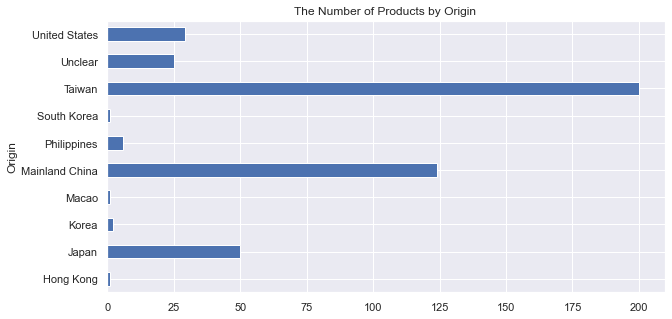

In [32]:
count_origin = df.groupby([df['Origin']])['Product_Name'].count()
count_origin.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Origin ")

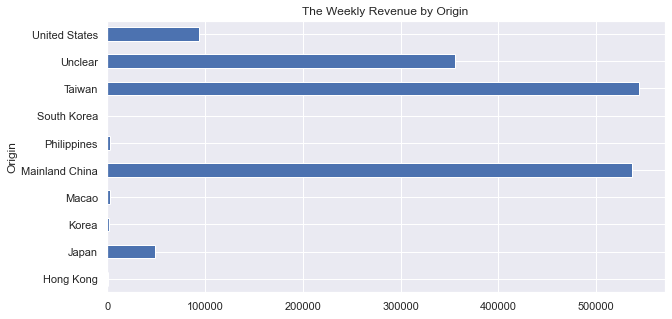

In [33]:
sum_revenue = df.groupby([df['Origin']])['Weekly_Revenue'].sum()
sum_revenue.plot(kind='barh',figsize=(10,5),legend=None, title="The Weekly Revenue by Origin ")

In [34]:
count_platform = df.groupby(['Platform'])['Product_Name'].count()
count_platform

Platform
Freshgogo     20
Weee          48
Yami         371
Name: Product_Name, dtype: int64

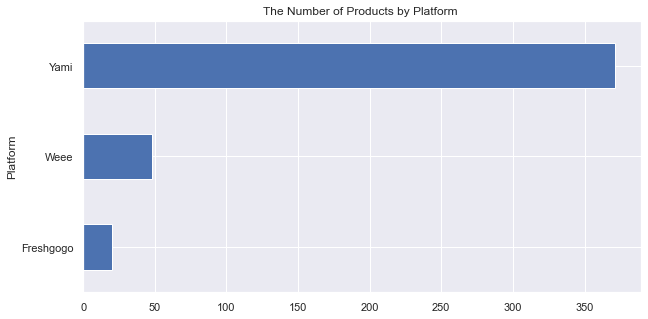

In [35]:
platform = df.groupby([df['Platform']])['Brand'].count()
platform.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Platform ")

Text(0.5, 1.0, 'Figure 5: Correlations')

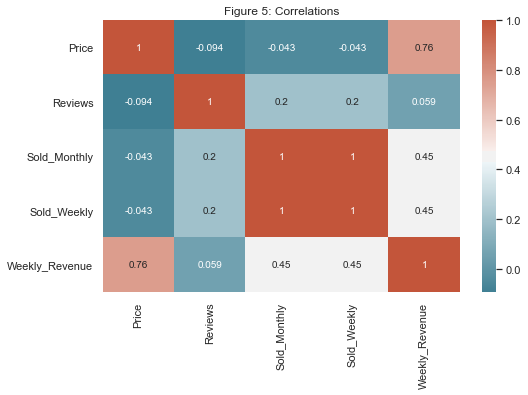

In [36]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(8,5))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

## Origin vs Platform


Text(0.5, 1.0, 'Platform vs. Origin')

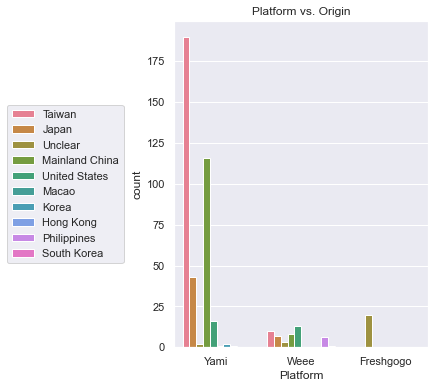

In [37]:
# Origin vs Platform

plt.rcParams['figure.figsize'] = (10, 6)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Platform',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Platform vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


Platform,Freshgogo,Weee,Yami
Origin,,,
Hong Kong,0,0,1
Japan,0,7,43
Korea,0,0,2
Macao,0,0,1
Mainland China,0,8,116
Philippines,0,6,0
South Korea,0,1,0
Taiwan,0,10,190
Unclear,20,3,2


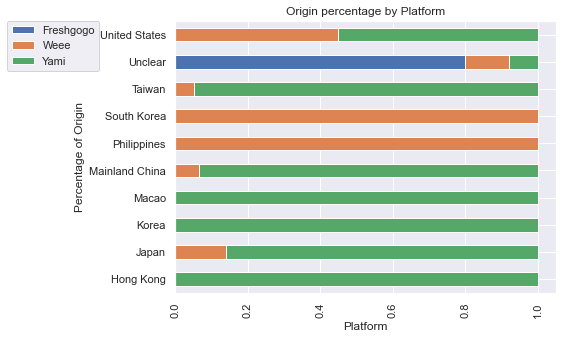

In [38]:
# check the Origin percentage of Platform
plt.rcParams['figure.figsize'] = (15, 5)
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Origin, df.Platform)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax)
plt.title('Origin percentage by Platform')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Platform')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Origin')

c2_c

## Origin Vs Sold_Weekly_Group

In [39]:
df['Sold_Weekly_Group'] = pd.cut(x = df['Sold_Weekly'], 
                                   bins = [0,50,100,200,300,400,500,1000,2000,10000],
                                   labels = ['Less than 50','50+','100+','200+','300+','400+','500+','1000+','2000+'])
df.head()

,Brand,Category,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Sold_Weekly_Group
0,formosa yay,Mochi,Taiwan,Yami,1.99,Mochi with Taro Filling 180g,4.4,128,1600,400,796.0,300+
1,formosa yay,Mochi,Taiwan,Yami,1.99,Mochi with Red Bean Filling 180g,4.3,122,1600,400,796.0,300+
2,royal family,Mochi,Taiwan,Yami,2.99,Mochi Strawberry Flavor 216g,3.7,74,1600,400,1196.0,300+
3,yuki&love,Mochi,Taiwan,Yami,2.29,YUKI/LOVE Japan Mochi Red Bean,4.1,45,1600,400,916.0,300+
4,royal family,Mochi,Taiwan,Yami,2.99,Mochi Cantaloupe Flavor 216g,4,39,1600,400,1196.0,300+


Text(0.5, 1.0, 'Sold_Weekly_Group vs. Origin')

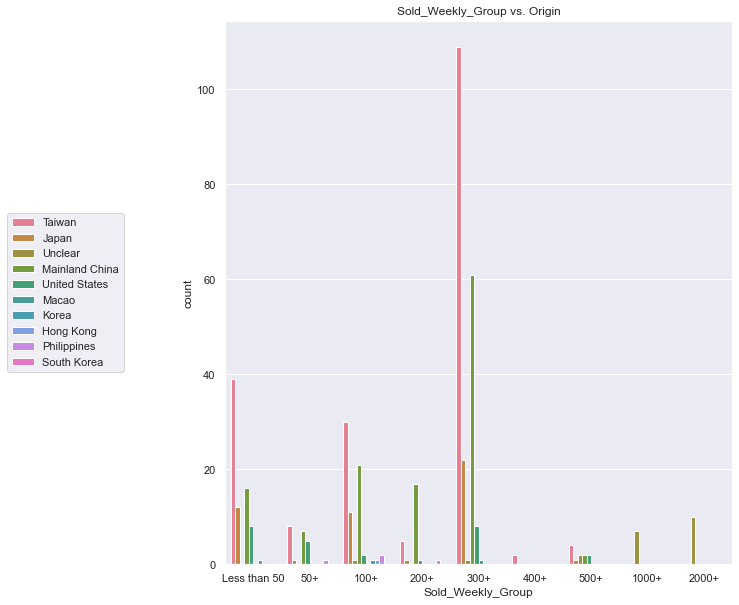

In [40]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 10)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Sold_Weekly_Group',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Sold_Weekly_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Sold_Weekly_Group,Less than 50,50+,100+,200+,300+,400+,500+,1000+,2000+
Origin,,,,,,,,,
Hong Kong,0,0,1,0,0,0,0,0,0
Japan,12,1,11,1,22,0,1,0,0
Korea,1,0,1,0,0,0,0,0,0
Macao,0,0,0,0,1,0,0,0,0
Mainland China,16,7,21,17,61,0,2,0,0
Philippines,0,1,2,1,0,0,0,0,0
Taiwan,39,8,30,5,109,2,4,0,0
Unclear,0,0,1,0,1,0,2,7,10
United States,8,5,2,1,8,0,2,0,0


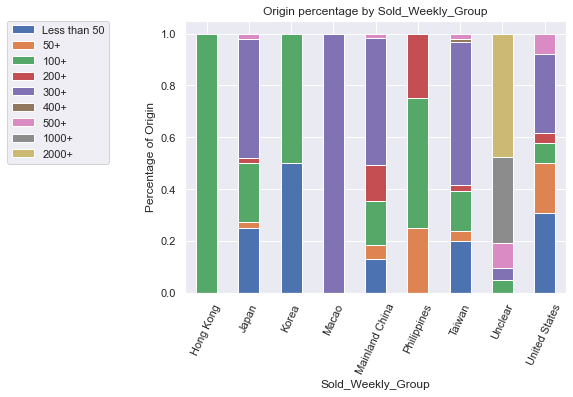

In [51]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (15, 5)
# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab(  df.Origin, df.Sold_Weekly_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Origin percentage by Sold_Weekly_Group')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Sold_Weekly_Group')
plt.xticks(rotation=65)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Origin

In [42]:
df['Price_Group'] = pd.cut(x = df['Price'], 
                                   bins = [0,2,4,6,8,10,12,14,16,10000],
                                   labels = ['Less than 2','2+','4+','6+','8+','10+','12+','14+','16+'])
df.head()

,Brand,Category,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Sold_Weekly_Group,Price_Group
0,formosa yay,Mochi,Taiwan,Yami,1.99,Mochi with Taro Filling 180g,4.4,128,1600,400,796.0,300+,Less than 2
1,formosa yay,Mochi,Taiwan,Yami,1.99,Mochi with Red Bean Filling 180g,4.3,122,1600,400,796.0,300+,Less than 2
2,royal family,Mochi,Taiwan,Yami,2.99,Mochi Strawberry Flavor 216g,3.7,74,1600,400,1196.0,300+,2+
3,yuki&love,Mochi,Taiwan,Yami,2.29,YUKI/LOVE Japan Mochi Red Bean,4.1,45,1600,400,916.0,300+,2+
4,royal family,Mochi,Taiwan,Yami,2.99,Mochi Cantaloupe Flavor 216g,4,39,1600,400,1196.0,300+,2+


Text(0.5, 1.0, 'Price_Group vs. Origin')

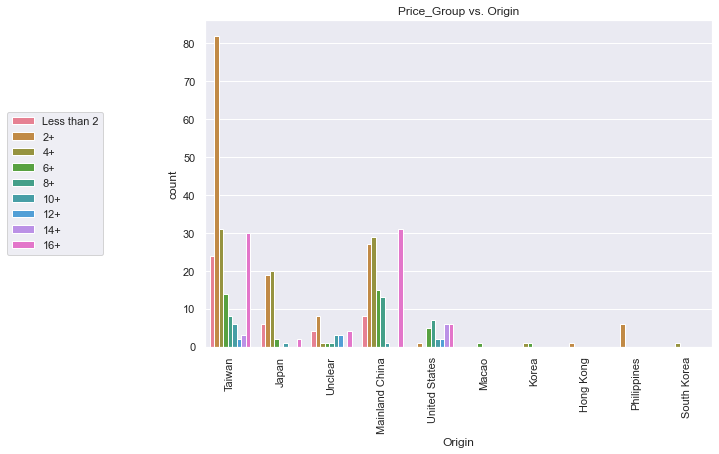

In [43]:
# origin vs Price group

plt.rcParams['figure.figsize'] = (20, 6)

# compare the year with Origin with price group
plt.subplot(121)
sns.countplot(x='Origin',hue= 'Price_Group', data=df, palette = 'husl')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


Origin,Hong Kong,Japan,Korea,Macao,Mainland China,Philippines,South Korea,Taiwan,Unclear,United States
Price_Group,,,,,,,,,,
Less than 2,0,6,0,0,8,0,0,24,4,0
2+,1,19,0,0,27,6,0,82,8,1
4+,0,20,1,0,29,0,1,31,1,0
6+,0,2,1,1,15,0,0,14,1,5
8+,0,0,0,0,13,0,0,8,1,7
10+,0,1,0,0,1,0,0,6,3,2
12+,0,0,0,0,0,0,0,2,3,2
14+,0,0,0,0,0,0,0,3,0,6
16+,0,2,0,0,31,0,0,30,4,6


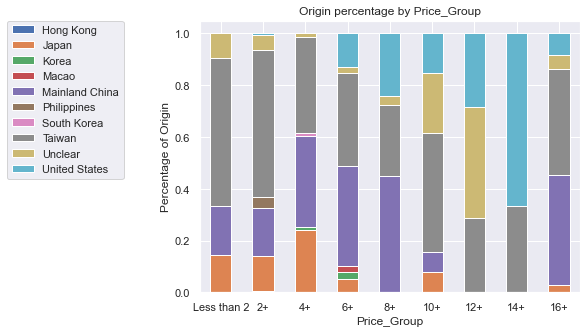

In [53]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (15, 5)

# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Price_Group, df.Origin)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Origin percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Sold_Weekly_Group


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


Sold_Weekly_Group,Less than 50,50+,100+,200+,300+,400+,500+,1000+,2000+
Price_Group,,,,,,,,,
Less than 2,4,0,15,5,13,0,1,1,3
2+,19,2,28,11,75,1,0,1,4
4+,12,1,13,1,46,1,5,0,1
6+,7,0,7,3,20,0,1,0,1
8+,14,3,1,3,6,0,0,1,0
10+,6,0,0,0,2,0,1,2,0
12+,0,1,2,0,1,0,0,1,1
14+,6,2,1,0,0,0,0,0,0
16+,8,13,2,2,39,0,3,1,0


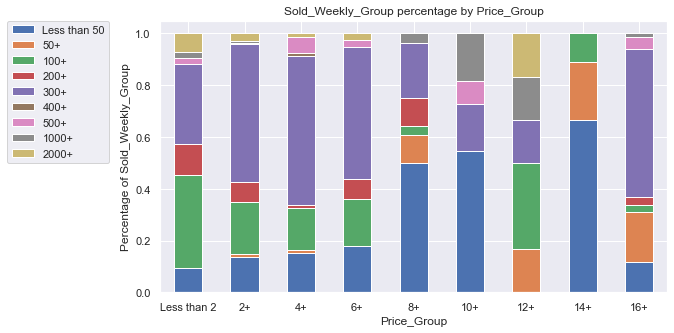

In [45]:
plt.rcParams['figure.figsize'] = (20, 5)

# check the Price_Group percentage of Sold_Weekly_Group
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Price_Group, df.Sold_Weekly_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Sold_Weekly_Group percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.1, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Sold_Weekly_Group')

c2_c

Text(0.5, 1.0, 'Price_Group vs. Sold_Weekly_Group')

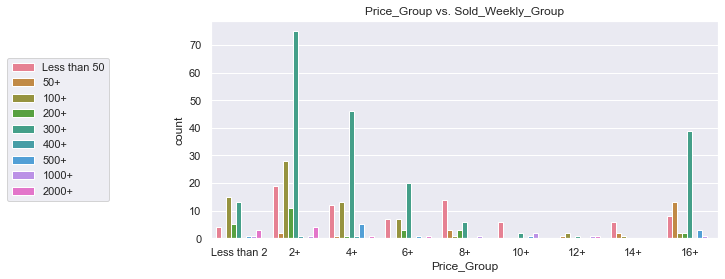

In [46]:
# price group vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 4)

# compare the year with price group with sold weekly group
plt.subplot(121)
sns.countplot(x='Price_Group',hue= 'Sold_Weekly_Group', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Sold_Weekly_Group')

In [47]:
df.to_csv(r'C:\Users\13750\Desktop\Empire Bazaar Group Corp\US chinese product market\SNACK MARKET\Analysis Data\Mochi\mochi.csv', index = False)